Каждое задание должно включать в себя следующие шаги: загрузка и предварительная обработка данных, применение метода отбора признаков, обучение модели на выбранных признаках и оценка производительности модели. Для оценки модели могут быть использованы такие метрики, как accuracy для задач классификации и MSE для задач регрессии. 
Здесь можно найти больше датасетов для этих задач:  
•	[UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php),  
•	[Kaggle Datasets](https://www.kaggle.com/datasets),  
•	[Google's Dataset Search](https://datasetsearch.research.google.com/)  

Задание 1: Отбор признаков с использованием корреляционных матриц.  
Для начала, используйте датасет о винах из sklearn.datasets. Найти корреляционную матрицу для датасета и, дополнительно, визуализируйте ее с помощью seaborn. 

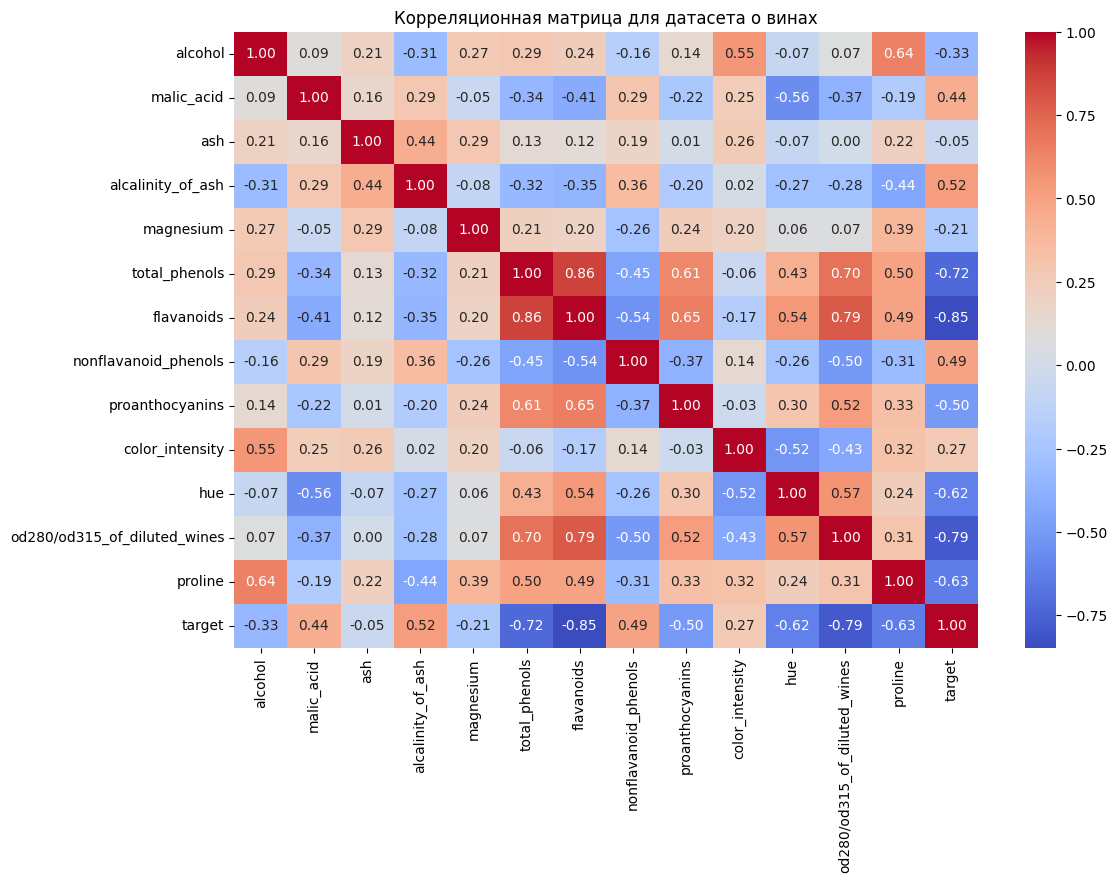

In [4]:
from sklearn.datasets import load_wine
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Загружаем датасет
wine_data = load_wine()

# Преобразуем данные в DataFrame для удобной работы
df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
df['target'] = wine_data.target  # Добавим колонку с метками классов

# Корреляционная матрица показывает, насколько каждый признак связан с остальными признаками.
# Коэффициенты корреляции варьируются от -1 до 1, где значения, близкие к 1 или -1, указывают
# на сильную положительную или отрицательную корреляцию соответственно.

# Вычисляем корреляционную матрицу
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляционная матрица для датасета о винах")
plt.show()

Задание 2: Отбор признаков на основе важности признаков в случайном лесе.  
Используйте тот же датасет и подгоните модель RandomForestRegressor к вашим данным, затем используйте атрибут feature_importances_ чтобы определить наиболее важные признаки.

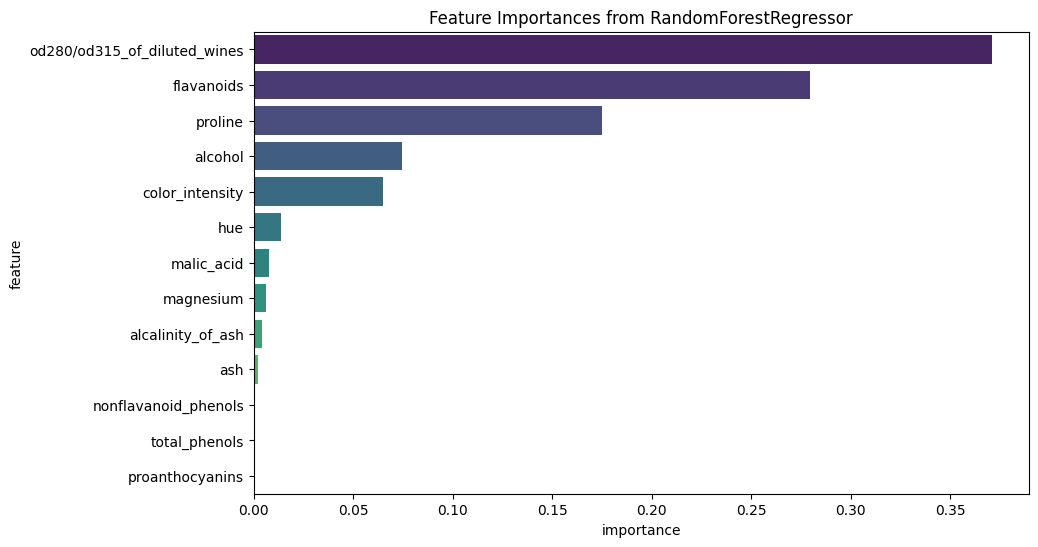

In [7]:
from sklearn.datasets import load_wine
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sb

# Загружаем данные
wine_data = load_wine()
df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
df['target'] = wine_data.target

# Разделяем данные на признаки и целевую переменную
X = df.drop(columns=['target'])
y = df['target']

# Разделяем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем и обучаем модель
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Извлекаем значения важности признаков
feature_importances = model.feature_importances_

# Создаем DataFrame для отображения важности признаков
feature_importances_df = pd.DataFrame({
    'feature': wine_data.feature_names,
    'importance': feature_importances
}).sort_values(by='importance', ascending=False)

# Визуализируем важность признаков
plt.figure(figsize=(10, 6))
sb.barplot(data=feature_importances_df, x='importance', y='feature', hue='feature', palette='viridis')
plt.title("Feature Importances from RandomForestRegressor")
plt.show()

Задание 3: Использование выбора признаков на основе p-value.  
Для этого задания можно использовать набор данных Boston Housing из sklearn.datasets.

In [11]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import statsmodels.api as sm

# Загрузка датасета
california_data = fetch_california_housing()
df = pd.DataFrame(data=california_data.data, columns=california_data.feature_names)
df['target'] = california_data.target

# Разделяем данные на признаки и целевую переменную
X = df.drop(columns=['target'])
y = df['target']

# Добавляем константу к признакам (необходима для statsmodels)
X = sm.add_constant(X)

# Строим модель линейной регрессии и оцениваем ее
model = sm.OLS(y, X).fit()

# Выводим сводку по модели для получения значений p-value
print(model.summary())

# Устанавливаем пороговое значение для p-value
p_value_threshold = 0.05

# Получаем имена значимых признаков
significant_features = model.pvalues[model.pvalues < p_value_threshold].index
print("Significant features based on p-value:")
print(significant_features)

# Dep. Variable: target - то, что пытаемся предсказать
# R-squared: 0.606 - значит, что примерно 60.6% дисперсии целевой переменной объясняется моделью
# F-statistic и Prob (F-statisctic) - статистика и p-value. Это значит что хотя бы один из признаков значительно влияет
# coef - значение коэффициента показывает насколько меняется целевая переменная при изменении признака на одну единицу, 
# при условии, что остальные признаки остаются постоянными. Положительные значения показывают положительное влияние на
# целевую переменную, отрицательные — отрицательное.
# std err - оценка того, насколько надежен коэффициент. Чем ниже ошибка, тем более точной считается оценка
# t и P>|t| - t-статистика и p-value для оценки значимости каждого признака. Если p-value меньше 0.05, признак считается 
# статистически значимым и влияет на предсказания.
# [0.025 0.975] - доверительный интервал для коэффициента признака. Если интервал не включает ноль, признак считается значимым.

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Sat, 26 Oct 2024   Prob (F-statistic):               0.00
Time:                        14:44:59   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.9419      0.659    -56.067      0.0

Задание 4: Отбор признаков с помощь метода взаимной информации.  
Используйте любой датасет, с которым вам приятно работать. Установите библиотеку sklearn и примените функцию mutual_info_classif или mutual_info_regression для отбора признаков.

In [15]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler

# Загрузка датасета
df = pd.read_csv('Data/winequality-red.csv')

# Разделяем данные на признаки и целевую переменную
X = df.drop(columns=['quality'])  # все признаки, кроме целевой переменной
y = df['quality']  # целевая переменная

# Вычисляем взаимную информацию
mi = mutual_info_regression(X, y, random_state=0)

# Создаем DataFrame для удобного отображения
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)
print(mi_df)

# Чем выше значение Mutual Information, тем больше признак зависит от целевой переменной
# quality, и более значимым он считается для модели.

                 Feature  Mutual Information
10               alcohol            0.177440
9              sulphates            0.118193
1       volatile acidity            0.104013
7                density            0.088098
6   total sulfur dioxide            0.087926
2            citric acid            0.071051
0          fixed acidity            0.059578
5    free sulfur dioxide            0.028708
4              chlorides            0.023647
3         residual sugar            0.014215
8                     pH            0.013112


Задание 5: Используйте метод Recursive Feature Elimination на том же датасете.  
Постройте модель, например, линейную регрессию или SVM, и используйте RFE для выбора лучшего подмножества признаков.

In [18]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

# Загрузка данных
df = pd.read_csv('Data/winequality-red.csv')

# Разделяем данные на признаки и целевую переменную
X = df.drop(columns=['quality'])  # Признаки
y = df['quality']  # Целевая переменная

# Создаем модель линейной регрессии
model = LinearRegression()

# Создаем RFE с числом отбираемых признаков (например, 5)
rfe = RFE(estimator=model, n_features_to_select=5)

# Обучаем RFE на данных
rfe.fit(X, y)

# Получаем результаты
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

# Получили список признаков, которые считаются наиболее важными

Selected Features: Index(['volatile acidity', 'chlorides', 'density', 'pH', 'sulphates'], dtype='object')


Задание 6: Сравните различные методы отбора признаков. 
Примените каждый из методов отбора признаков к одному и тому же датасету, а затем сравните производительность моделей машинного обучения, обученных на этих различных подмножествах признаков.

In [19]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE, mutual_info_regression
from sklearn.linear_model import LinearRegression
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Загружаем датасет
df = pd.read_csv('Data/winequality-red.csv')
X = df.drop(columns=['quality'])
y = df['quality']

# Набор для хранения подмножеств признаков
selected_features = {}

# Метод 1 - Корреляционная матрица
correlations = X.corrwith(y).abs()
corr_selected = correlations[correlations > 0.2].index  # Признаки с корреляцией > 0.2
selected_features['Correlation'] = X[corr_selected]

# Метод 2 - RandomForestRegressor
forest = RandomForestRegressor(random_state=0)
forest.fit(X, y)
importance = pd.Series(forest.feature_importances_, index=X.columns)
important_features = importance.nlargest(5).index  # Топ-5 важных признаков
selected_features['RandomForest'] = X[important_features]

# Метод 3 - p-value
X_with_const = sm.add_constant(X)
model = sm.OLS(y, X_with_const).fit()
p_values = model.pvalues[1:]  # Пропускаем константу
pvalue_selected = p_values[p_values < 0.05].index  # Признаки с p-value < 0.05
selected_features['p-value'] = X[pvalue_selected]

# Метод 4 - Mutual Information
mi = mutual_info_regression(X, y, random_state=0)
mi_series = pd.Series(mi, index=X.columns)
mi_selected = mi_series.nlargest(5).index  # Топ-5 признаков по взаимной информации
selected_features['Mutual Information'] = X[mi_selected]

# Метод 5 - RFE
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X, y)
rfe_selected = X.columns[rfe.support_]
selected_features['RFE'] = X[rfe_selected]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

results = {}

for method, features in selected_features.items():
    # Создаем и обучаем модель линейной регрессии
    model = LinearRegression()
    model.fit(features.loc[X_train.index], y_train)
    
    # Оценка на тестовом наборе
    y_pred = model.predict(features.loc[X_test.index])
    r2 = r2_score(y_test, y_pred)
    
    # Сохранение результатов
    results[method] = r2
    print(f"{method} R^2 Score: {r2}")

# Метод с наивысшим R^2 показывает наиболее эффективный способ отбора признаков

Correlation R^2 Score: 0.2996442610142639
RandomForest R^2 Score: 0.3156378903919277
p-value R^2 Score: 0.3332856888188832
Mutual Information R^2 Score: 0.3110921030064452
RFE R^2 Score: 0.2125098371231744
